# importation 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)

In [2]:
#os.chdir ("/Users/judith/Documents/OCP4/DAN-P4-FAO")

In [3]:
population = pd.read_csv("DAN-P4-FAO/population.csv")
sousNutrition = pd.read_csv("DAN-P4-FAO/sous_nutrition.csv")
dispoAlimentaire = pd.read_csv("DAN-P4-FAO/dispo_alimentaire.csv")
aideAlimentaire = pd.read_csv("DAN-P4-FAO/aide_alimentaire.csv")
cereales = pd.read_csv("DAN-P4-FAO/cereales-2017.csv")

# Cleaning 


In [4]:
# Remplir les valeurs NA/NaN par 0

In [5]:
#Revoir et faire des head , controle sur les colonnes non numériques
sousNutrition = sousNutrition.fillna(0)
dispoAlimentaire = dispoAlimentaire.fillna(0)
aideAlimentaire = aideAlimentaire.fillna(0)
cereales =cereales.fillna(0)

In [6]:
#Mettre à la bonne échelle les valeurs de dispoAlimentaire

In [7]:
dispoAlimentaire = dispoAlimentaire.apply(lambda x: 1000*x if x.name in ['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock'] else x)

In [8]:
#Convertir les valeurs au type numérique , définir l'anlyse invalide en NAN avec coerce puis remplacer les
#NAN par 0

In [9]:
sousNutrition['Valeur'] = pd.to_numeric(sousNutrition['Valeur'], errors='coerce')
sousNutrition.fillna(0, inplace=True)

In [10]:
#Mettre à la bonne échelle les valeurs de population

In [11]:
population.Valeur =population.Valeur*1000

In [12]:
#Séléction de la population sur 2017

In [13]:
population = population.loc[population['Année']==2017]

In [14]:
#Mettre à la bonne échelle les valeurs de sous nutrition

In [15]:
sousNutrition.Valeur=sousNutrition.Valeur*1000000

In [16]:
sousNutrition.rename(columns= {'Valeur_x':'Personne sous-nutrition', 'Valeur_y': 'Population'}, inplace= True)

# La proportion de personnes en état de sous-nutrition en 2017

In [17]:
#Filtrage sur l'année 2017 et renommage des colonnes
sousNutrition = pd.merge(sousNutrition.loc[sousNutrition['Année']=='2016-2018',['Valeur', 'Zone']],
                             population.loc[population['Année']==2017,['Valeur','Zone']], on='Zone')
sousNutrition.rename(columns= {'Valeur_x':'Personne sous-nutrition', 'Valeur_y': 'Population'}, inplace= True)

In [18]:
# Calcul de la population mondiale 

populationMondiale = (sousNutrition['Population'].sum())
print("La population mondiale compte {:,.0f} habitants.".format(populationMondiale).replace(',', ' '))

La population mondiale compte 7 543 798 779 habitants.


In [19]:
# Modification du type 
sousNutrition['Personne sous-nutrition'] = sousNutrition['Personne sous-nutrition'].astype("float64")

In [20]:
# Calcul du nombre total de personnes en sous-nutrition 
personneSousNutrition = sousNutrition['Personne sous-nutrition'].sum()
print("Le nombre total de personnes en sous-nutrition est {:,.0f} habitants.".format(personneSousNutrition).replace(',', ' '))

Le nombre total de personnes en sous-nutrition est 535 700 000 habitants.


In [21]:
#Proportion du nombre de personnes en sous nutrition
proportion = (personneSousNutrition / populationMondiale )*100
print("En 2017 : {:,.2f} % de la population mondiale est en état de sous-nutrition.".format(proportion).replace(',', ' '))

En 2017 : 7.10 % de la population mondiale est en état de sous-nutrition.


# Le nombre de personnes qui pourraient être nourries en 2017

In [22]:
# Sélection des colonnes
subColonne=['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Origine',
                           'Disponibilité alimentaire en quantité (kg/personne/an)',
                           'Disponibilité de matière grasse en quantité (g/personne/jour)',
                           'Disponibilité de protéines en quantité (g/personne/jour)',
     'Disponibilité intérieure','Exportations - Quantité','Importations - Quantité']
subdispoAlimentaire=dispoAlimentaire[subColonne]

In [23]:
subdispoAlimentaire.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Origine,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
0,Afghanistan,5.0,animale,1.72,0.20,0.77,53000.0,0.0,0.0
1,Afghanistan,1.0,vegetale,1.29,0.01,0.02,41000.0,2000.0,40000.0
2,Afghanistan,1.0,vegetale,0.06,0.01,0.03,2000.0,0.0,2000.0
3,Afghanistan,0.0,vegetale,0.00,0.00,0.00,0.0,0.0,0.0
4,Afghanistan,4.0,vegetale,2.70,0.02,0.05,82000.0,0.0,82000.0


In [24]:
# Jointure avec comme clé la colonne 'Zone'et ajouter les données complémentaires dispoAlimentaire

mergeDispoPopulation = pd.merge( subdispoAlimentaire,population , on = "Zone", how="left")
mergeDispoPopulation.head()


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Origine,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Année,Valeur
0,Afghanistan,5.0,animale,1.72,0.20,0.77,53000.0,0.0,0.0,2017.0,36296113.0
1,Afghanistan,1.0,vegetale,1.29,0.01,0.02,41000.0,2000.0,40000.0,2017.0,36296113.0
2,Afghanistan,1.0,vegetale,0.06,0.01,0.03,2000.0,0.0,2000.0,2017.0,36296113.0
3,Afghanistan,0.0,vegetale,0.00,0.00,0.00,0.0,0.0,0.0,2017.0,36296113.0
4,Afghanistan,4.0,vegetale,2.70,0.02,0.05,82000.0,0.0,82000.0,2017.0,36296113.0


In [25]:
# Calcul de la disponibilité alimentaire (Kcal) totale

totalDispoKal = (((mergeDispoPopulation['Valeur']) * (mergeDispoPopulation['Disponibilité alimentaire (Kcal/personne/jour)'])).sum())*365
print("La quantité de disponibilité alimentaire est de : {:,.2f} Kcal".format(totalDispoKal).replace(',', ' '))



La quantité de disponibilité alimentaire est de : 7 635 429 388 975 815.00 Kcal


In [26]:
# Calcul du nombre de personnes pouvant être nourris avec la disponibilité alimentaire 

totalNourri = totalDispoKal/(2500*365)

print("Le nombre théorique de personnes qui pourraient être nourries en 2017 est: {:,.0f} personnes.".format(totalNourri).replace(',', ' '))

Le nombre théorique de personnes qui pourraient être nourries en 2017 est: 8 367 593 851 personnes.


In [27]:
# Calcul de la population mondiale
populationMondiale = (population['Valeur']).sum()

print("La population totale en 2017 est: {:,.0f} personnes.".format(populationMondiale).replace(',', ' '))


La population totale en 2017 est: 7 548 134 111 personnes.


In [28]:
# Calcul de la proportion de personnes pouvant être nourries
proportion = ((totalNourri/populationMondiale)*100)
print("La proportion de personnes pouvant être nourries avec la disponibilité alimentaire totale est de : {:,.2f} %".format(proportion))

La proportion de personnes pouvant être nourries avec la disponibilité alimentaire totale est de : 110.86 %


# Disponibilité alimentaire des produits végétaux en 2017

In [29]:
# Garder seulement les colonnes dont nous avons besoin
dispoAlimentaireA = dispoAlimentaire[['Zone','Produit','Origine','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de protéines en quantité (g/personne/jour)']]

In [30]:
# Filtrer sur les données pour les aliments d'origine végétal.
dispoAlimentaireA = dispoAlimentaireA.loc[dispoAlimentaire['Origine'] == 'vegetale',:]

In [31]:
# Regroupement des données par 'Zone'
dispoAlimentaireA= dispoAlimentaireA.groupby('Zone').sum()

dispoAlimentaireA.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,
Afghanistan,1871.0,271.49,46.05
Afrique du Sud,2533.0,425.17,48.94
Albanie,2203.0,706.49,51.96
Algérie,2915.0,632.35,66.94
Allemagne,2461.0,568.82,39.90


In [32]:
#Jointure sur la colonne Zone
dispoAlimentaireA = pd.merge(dispoAlimentaireA,population, on= 'Zone')
dispoAlimentaireA.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Année,Valeur
0,Afghanistan,1871.0,271.49,46.05,2017,36296113.0
1,Afrique du Sud,2533.0,425.17,48.94,2017,57009756.0
2,Albanie,2203.0,706.49,51.96,2017,2884169.0
3,Algérie,2915.0,632.35,66.94,2017,41389189.0
4,Allemagne,2461.0,568.82,39.90,2017,82658409.0


In [33]:
# Calcul de la disponibilité alimentaire 
totalDispoVegKcal=((((dispoAlimentaireA['Valeur'])*dispoAlimentaireA['Disponibilité alimentaire (Kcal/personne/jour)'] ).sum())/2500).round()
print("Le nombre de personnes pouvant être nourries avec la disponibilité alimentaire végétale totale est de : {:,} personnes".format(totalDispoVegKcal).replace(',', ' '))

Le nombre de personnes pouvant être nourries avec la disponibilité alimentaire végétale totale est de : 6 904 305 685.0 personnes


In [34]:

# Calcul de la population totale
totalPopulation = (population['Valeur']).sum().round()

print("La population mondiale en 2017 est de {:,} humains. ".format(totalPopulation).replace(',', ' '))


La population mondiale en 2017 est de 7 548 134 111.0 humains. 


In [35]:

# Calcul de la proportion de disponibilité végétale par rapport à la population mondiale 
proportion = ((totalDispoVegKcal/totalPopulation)*100)

print("La proportion de personnes pouvant être nourries avec la disponibilité alimentaire végétale (Kcal) totale est de : {:,.2f} %".format(proportion).replace(',', ' '))

La proportion de personnes pouvant être nourries avec la disponibilité alimentaire végétale (Kcal) totale est de : 91.47 %


In [36]:
#La proportion de personnes pouvant être nourries avec la disponibilité alimentaire totale est de 110.86 % et celle
#avec la disponibilité végétale est de 91.47% , cad qu'il y ' a seulement 19.39 % 
#de disponibilités alimentaires qui ne sont pas végétales

# L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

In [37]:
# Garder seulement les colonnes qui me seront utiles
dispoAlimentaireB = dispoAlimentaire[['Zone','Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock']]

In [38]:
# Regroupement de mes données par rapport à la colonne Zone et somme de la dispoAlimentaire
dispoAlimentaireB = dispoAlimentaireB.groupby('Zone').sum().reset_index(drop=True)
dispoAlimentaireB.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,768000.0,415000.0,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0
1,5309000.0,876000.0,61256000.0,11674000.0,7517000.0,29812000.0,2193000.0,63263000.0,253000.0,22819000.0,2153000.0
2,660000.0,174000.0,4758000.0,94000.0,933000.0,3476000.0,276000.0,3964000.0,55000.0,113000.0,-45000.0
3,4352000.0,1707000.0,42630000.0,655000.0,17403000.0,31729000.0,3753000.0,26359000.0,449000.0,637000.0,-479000.0
4,30209000.0,7711000.0,162275000.0,57431000.0,65353000.0,79238000.0,3781000.0,154547000.0,1551000.0,39842000.0,-192000.0


In [39]:
# Calcul de la proportion de disponibilité alimentaire pour les animaux
proportionAlimAnimaux = dispoAlimentaireB['Aliments pour animaux'].sum()/dispoAlimentaireB['Disponibilité intérieure'].sum()*100
print("La proportion pour l'alimentation animale est de : {:,.2f} %".format(proportionAlimAnimaux).replace(',', ' '))

La proportion pour l'alimentation animale est de : 13.24 %


In [40]:
# Calcul de la proportion de disponibilité alimentaire perdue
proportionPertes = dispoAlimentaireB['Pertes'].sum()/dispoAlimentaireB['Disponibilité intérieure'].sum()*100
print("La proportion des pertes est de : {:,.2f} %".format(proportionPertes).replace(',', ' '))

La proportion des pertes est de : 4.61 %


In [41]:
# Calcul de la proportion de disponibilité alimentaire pour l'alimentation humaine
proportionAlimHumains = dispoAlimentaireB['Nourriture'].sum()/dispoAlimentaireB['Disponibilité intérieure']\
.sum()*100
print("La proportion pour l'alimentation humaine est de : {:,.2f} %".format(proportionAlimHumains).replace(',', ' '))

La proportion pour l'alimentation humaine est de : 49.51 %


In [42]:
# Calcul de la proportion de disponibilité alimentaire pour tout autres utilisations
proportionAutres = dispoAlimentaireB['Autres Utilisations'].sum()/dispoAlimentaireB['Disponibilité intérieure']\
.sum()*100
print("La proportion pour tout autre est de : {:,.2f} %".format(proportionAutres).replace(',', ' '))

La proportion pour tout autre est de : 8.78 %


In [43]:
# Calcul de la proportion de disponibilité alimentaire pour le traitement
proportionAutreb = dispoAlimentaireB['Traitement'].sum()/dispoAlimentaireB['Disponibilité intérieure']\
.sum()*100
print("La proportion pour tout autre est de : {:,.2f} %".format(proportionAutreb).replace(',', ' '))

La proportion pour tout autre est de : 22.38 %


In [44]:
# Calcul de la proportion de disponibilité alimentaire pour les semences
proportionAutrec = dispoAlimentaireB['Semences'].sum()/dispoAlimentaireB['Disponibilité intérieure']\
.sum()*100
print("La proportion pour tout autre est de : {:,.2f} %".format(proportionAutrec).replace(',', ' '))

La proportion pour tout autre est de : 1.57 %


In [45]:
# Calcul de la proportion de disponibilité alimentaire pour le total des autres
Autres=proportionAutres+proportionAutreb+proportionAutrec
print("La proportion pour tout autre est de : {:,.2f} %".format(Autres).replace(',', ' '))

La proportion pour tout autre est de : 32.74 %


(0.0, 100.0)

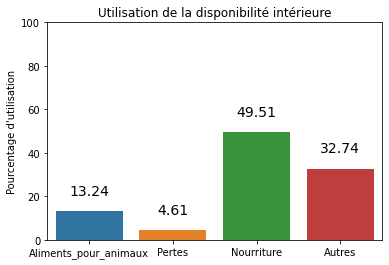

In [46]:
#Enregistre les valeurs précédentes dans des listes pour le graphique
x_axis = ["Aliments_pour_animaux", "Pertes", "Nourriture","Autres"]
y_axis = [proportionAlimAnimaux, proportionPertes, proportionAlimHumains ,Autres]

#Création du graphique
plt.ylabel("Pourcentage d'utilisation")
plt.title('Utilisation de la disponibilité intérieure')

g=sb.barplot(x = x_axis, y = y_axis)

#Affiche les valeurs sur le graphique
for p in g.patches:
    g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                textcoords='offset points')
#Règle la taille du graphique
g.set_ylim(0,100)


# les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [47]:
# Changement de type de la colonne Valeur de object à float64
sousNutrition['Personne sous-nutrition'] =sousNutrition['Personne sous-nutrition'].apply(pd.to_numeric)
sousNutrition.head()

,Personne sous-nutrition,Zone,Population
0,10500000.0,Afghanistan,36296113.0
1,3100000.0,Afrique du Sud,57009756.0
2,100000.0,Albanie,2884169.0
3,1300000.0,Algérie,41389189.0
4,0.0,Allemagne,82658409.0


In [48]:
# Création d'une nouvelle colonne proportion
sousNutrition['Proportion'] = sousNutrition['Personne sous-nutrition']/sousNutrition['Population']*100

In [49]:
# Je tri mes données par rapport à ma colonne 'proportion' et je choisi l'affichage par ordre décroissant
sousNutrition = sousNutrition.sort_values(by = 'Proportion', ascending = False) 

In [50]:
# Affichage des 10 premiers résultats
sousNutrition.head(10)


,Personne sous-nutrition,Zone,Population,Proportion
78,5300000.0,Haïti,10982366.0,48.259182
157,12000000.0,République populaire démocratique de Corée,25429825.0,47.188685
108,10500000.0,Madagascar,25570512.0,41.062924
103,1800000.0,Libéria,4702226.0,38.279742
100,800000.0,Lesotho,2091534.0,38.249438
183,5700000.0,Tchad,15016753.0,37.957606
161,4200000.0,Rwanda,11980961.0,35.055619
121,9400000.0,Mozambique,28649018.0,32.810898
186,400000.0,Timor-Leste,1243258.0,32.173531
0,10500000.0,Afghanistan,36296113.0,28.928718


# les pays qui ont le plus bénéficié d’aide depuis 2013

In [51]:
# Ouverture du fichier
aideAlimentaire = pd.read_csv("DAN-P4-FAO/aide_alimentaire.csv")

In [52]:
# Aperçu 
aideAlimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [53]:
# Filtre sur Pays bénéficiaire et somme des aides
aideAlimentaire = aideAlimentaire.groupby('Pays bénéficiaire').sum()

In [54]:
# Création de la colonne 'proportion'
aideAlimentaire['Proportion (%)']= (aideAlimentaire['Valeur']/aideAlimentaire['Valeur'].sum()*100)

In [55]:
# Tri des données en fonction de proportion (%) et affichage par ordre décroissant
aideAlimentaire = aideAlimentaire.sort_values(by = 'Proportion (%)', ascending = False) 

In [56]:
# Suppression de la colonne 'Année'
del aideAlimentaire['Année']

In [57]:
# Affichage des 10 premiers résultats
aideAlimentaire.head(10)

,Valeur,Proportion (%)
Pays bénéficiaire,,
République arabe syrienne,1858943,16.844506
Éthiopie,1381294,12.516368
Yémen,1206484,10.932356
Soudan du Sud,695248,6.299875
Soudan,669784,6.069137
Kenya,552836,5.009432
Bangladesh,348188,3.155048
Somalie,292678,2.652054
République démocratique du Congo,288502,2.614213


In [58]:
#On remarque que les pays ayant le plus bénéficié d'aide depuis 2013 comme la Somalie ou le Bangladesh 
#ne font pas partie du top 10 des pays avec la plus grande proportion de personnes sous alimenté en 2017 
#on en déduit que les aides ont réduit cette sous-nutrition et ont réellement eu un impact en les faisant déscendre 
#dans le classement

# les pays  ayant le plus/le moins de disponibilité/habitant

In [59]:
# Ouverture du fichier
dispoAlimentaire = pd.read_csv("DAN-P4-FAO/dispo_alimentaire.csv")
population = pd.read_csv("DAN-P4-FAO/population.csv")

In [60]:
# Aperçu 
dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [61]:
#Sélection des colonnes Zone et Disponibilité alimentaire
dispo = dispoAlimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]

In [62]:
#Sélection de la population en l'année 2017
popu = population.loc[population['Année']==2017,:]

In [63]:
#Somme des disponibilitées alimentaires
dispo = dispo.groupby('Zone').sum()

In [64]:
#Affichage
dispo.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0


In [65]:
#Jointure entre Population et Dispo alimentaire sur Zone
dispo = pd.merge(popu,dispo, on='Zone')
dispo.head(15)


,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0
5,Angola,2017,29816.766,2474.0
6,Antigua-et-Barbuda,2017,95.426,2416.0
7,Arabie saoudite,2017,33101.179,3255.0
8,Argentine,2017,43937.140,3226.0
9,Arménie,2017,2944.791,2924.0


In [66]:
# Création d'une dataframe qui affiche les pays avec le plus de disponibilité alimentaire
paysDispoPlus = dispo.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)','Valeur'], ascending = False) 

In [67]:
# Affichage des 10 premiers résultats
paysDispoPlus.head(10)

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2017,8819.901,3770.0
17,Belgique,2017,11419.748,3737.0
163,Turquie,2017,81116.450,3708.0
54,États-Unis d'Amérique,2017,325084.756,3682.0
80,Israël,2017,8243.848,3610.0
78,Irlande,2017,4753.279,3602.0
81,Italie,2017,60673.701,3578.0
95,Luxembourg,2017,591.910,3540.0
47,Égypte,2017,96442.591,3518.0
4,Allemagne,2017,82658.409,3503.0


In [68]:
# Création d'une dataframe qui affiche les pays avec le moins de disponibilité alimentaire
paysDispoMoins = dispo.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)','Valeur'], ascending = True) 

In [69]:
# Affichage des 10 premires résultats
paysDispoMoins.head(10)

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
131,République centrafricaine,2017,4596.023,1879.0
170,Zambie,2017,16853.599,1924.0
97,Madagascar,2017,25570.512,2056.0
0,Afghanistan,2017,36296.113,2087.0
70,Haïti,2017,10982.366,2089.0
136,République populaire démocratique de Corée,2017,25429.825,2093.0
156,Tchad,2017,15016.753,2109.0
171,Zimbabwe,2017,14236.595,2113.0
120,Ouganda,2017,41166.588,2126.0
158,Timor-Leste,2017,1243.258,2129.0


In [70]:
#Les pays ayant le moins de disponibilité alimentaire/habitant coincident avec les pays 
#ayant le plus haut taux de sous-nutrition

# Répartition des céréales entre l'alimentation humaine et animale 

In [71]:
# Ouverture du fichier téléchargé sur FAO
cerealesDispo = pd.read_csv("DAN-P4-FAO/cereales-2017.csv")

In [72]:
# Affichage de toutes les valeurs unique de la colonne 'Produit'
dispoAlimentaire['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [73]:
# Affichage de toutes les valeurs
cerealesDispo.head()

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Nouveaux Bilans Alimentaire,Afghanistan,Production,Blé et produits,2017,4281.0
1,Nouveaux Bilans Alimentaire,Afghanistan,Importations - Quantité,Blé et produits,2017,3080.0
2,Nouveaux Bilans Alimentaire,Afghanistan,Variation de stock,Blé et produits,2017,32.0
3,Nouveaux Bilans Alimentaire,Afghanistan,Exportations - Quantité,Blé et produits,2017,2.0
4,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité intérieure,Blé et produits,2017,7326.0


In [74]:
# Affichage de toutes les valeurs uniques de la colonne 'Produit'
cerealesDispo['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres'],
      dtype=object)

In [75]:
#Filtre sur les céréales
dispoA_filtered = dispoAlimentaire.loc[dispoAlimentaire.Produit.isin(list(cerealesDispo['Produit'].unique()))]

In [76]:
# Calcul de la proportion de céréales destinée aux Hommes et celle pour les animaux , filtrer sur 
dispoHomme = dispoA_filtered['Nourriture'].sum()/dispoA_filtered['Disponibilité intérieure'].sum()*100
dispoAnimaux = dispoA_filtered['Aliments pour animaux'].sum()/dispoA_filtered['Disponibilité intérieure'].sum()*100

print("La proportion de céréales destinée l'alimentation humaine est de : {:,.2f} %".format(dispoHomme).replace(',', ' '))
print("La proportion de céréales destinée aux animaux est de : {:,.2f} %".format(dispoAnimaux).replace(',', ' '))

La proportion de céréales destinée l'alimentation humaine est de : 18.13 %
La proportion de céréales destinée aux animaux est de : 69.34 %


In [77]:
#La grande majorité de disponibilité alimentaire est d'origine végétale , parmis elle les céréales qui sont déstinés 
#pour la plupart aux animaux

# La Thaïlande et l'utilisation du manioc

In [78]:
# J'applique mes deux restrictions sur mes colonnes 'Zone' et 'Produit'
dispoAlimentaireThailande =dispoAlimentaire.loc[(dispoAlimentaire['Zone']=='Thaïlande')& \
                                                (dispoAlimentaire['Produit']=='Manioc'),:]
dispoAlimentaireThailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [79]:
# Calcul de la proportion de manioc pour l'exportation
maniocExportation = (dispoAlimentaireThailande['Exportations - Quantité'].sum())/(dispoAlimentaireThailande \
                                                                                  ['Production'].sum())*100
print(f'La proportion d exportation ',round(maniocExportation,2))

La proportion d exportation  83.41


In [80]:
#Séléction de la population en sous nutrition sur la Thailande
sousNutritionThailande = sousNutrition[sousNutrition.Zone=='Thaïlande']

In [81]:
proportion = (sousNutritionThailande['Personne sous-nutrition'].sum()/ sousNutritionThailande['Population']\
              .sum())*100

In [82]:
# Calcul de la proportion de sous-nutrition en Thaïlande

print("La proportion de sous-nutrition en Thaïlande est de: {:,.2f} %".format(proportion).replace(',', ' '))

La proportion de sous-nutrition en Thaïlande est de: 8.96 %


In [83]:
#La majorité du manioc est exporté de la thailande alors que le pays a une proportion de sous-nutrition de 8.96 %
#et en aurait surement besoin